# Handling Imbalanced Dataset Using Cost Sensitive Neural Network


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('creditcard.csv')

Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

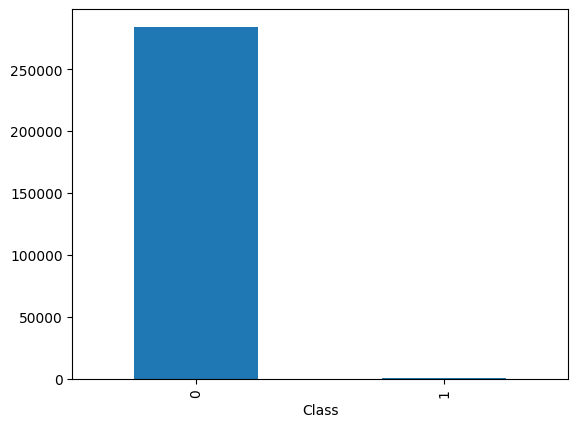

In [18]:
# Check imbalance in the dataset
print(df['Class'].value_counts())
df['Class'].value_counts().plot.bar()

In [8]:
len(df.columns) # 30 Parameters

31

In [19]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Method 1 --> Creating an ANN model and solving this problem without using any techniques

# Method 2 --> Solving this problem using weight handling techniques

In [22]:
# Standardize Amount and Time
scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

x = df.drop('Class', axis=1)
y = df['Class']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40)


In [23]:
yTrain.value_counts()

,count
Class,
0,199010
1,354


In [24]:
inputSize = x.shape[1]
print(inputSize)

30


In [25]:
model = Sequential()
model.add(Dense(64, input_dim=inputSize, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.fit(xTrain, yTrain, epochs=10, batch_size=64)

Epoch 1/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9995 - loss: 0.0020
Epoch 2/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9996 - loss: 0.0017
Epoch 3/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9996 - loss: 0.0016
Epoch 4/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9996 - loss: 0.0018
Epoch 5/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9996 - loss: 0.0015
Epoch 6/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9996 - loss: 0.0015
Epoch 7/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9996 - loss: 0.0014
Epoch 8/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9996 - loss: 0.0014
Epoch 9/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9997 - loss: 0.0012
Epoch 10/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9997 - loss: 0.0012


In [28]:
from sklearn.metrics import roc_auc_score
yPred = model.predict(xTest)
print(roc_auc_score(yTest, yPred))

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
0.9607912443754677


# Method 2 (Weighted Neural Network With Keras)
(1) Define Weights
(2) Fit the Model with those Specific Weights

In [31]:
# 0's are nearly 60 time more than 1
weightsAssigned = {0:1, 1:550}

In [33]:
# Defining model
model2 = Sequential()
model2.add(Dense(64, input_dim=inputSize, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model2.fit(xTrain, yTrain, epochs=10, batch_size=64, class_weight=weightsAssigned)

Epoch 1/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9633 - loss: 0.7184
Epoch 2/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9777 - loss: 0.2377
Epoch 3/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9721 - loss: 0.2070
Epoch 4/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9769 - loss: 0.1721
Epoch 5/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9801 - loss: 0.1483
Epoch 6/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9769 - loss: 0.1351
Epoch 7/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9830 - loss: 0.1090
Epoch 8/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9845 - loss: 0.0927
Epoch 9/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9816 - loss: 0.0949
Epoch 10/10
3116/3116 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9853 - loss: 0.0801


In [36]:
yPred2 = model2.predict(xTest)
print(roc_auc_score(yTest, yPred2))

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
0.9706767872145048


# ROC AUC Score
(1) Model 1 (Without Weight Initialization) --> 0.9607912443754677

(2) Model 2 (With Weight Initialization) --> 0.9706767872145048